In [ ]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import math
import random as rand

- Write a function generate_dataset() that will take the following input parameters:
    - no_of_clusters – the number of clusters to generate;
    - no_of_points_per_cluster – the number of 2-dimensional samples to generate
per each cluster.
- Example: generate_dataset(4, 100) will generate 4 clusters of a hundred 2-
dimensional samples per cluster.
- Each cluster must be generated by sampling the standard normal distribution. The samples of
the cluster should be transformed by means of a linear transformation and translation (shifting)
to a unique location in the two-dimensional space. The overall cluster transformation must
include:
    - Scaling of dimension-wise standard deviations of the cluster set;
    - Rotation of the set in the 2-D space by some angle;
    - Shifting of the cluster to a unique location.
- The rates of scaling, rotation and shifting for each cluster must be generated randomly within
experimentally set lower and upped bounds in order to yield visibly distinct clusters (distinct
by shape and location). Use matlplotlib’s scatter plots to visually inspect generated clusters and
fine-tune lower/upper bounds for transform parameter generation.
- The function will concatenate the cluster matrices into a single matrix called data_matrix
that will consist of 2 columns and no_of_clusters * no_of_points_per_cluster
rows. In other words, the concatenation will be performed via addition of new rows.
- The function generate_dataset() will return reference to data_matrix.
- If you find it helpful, please feel free to break the functionality generate_dataset() into
smaller functions that will be called from generate_dataset().

In [ ]:
# Zach
def generate_dataset(no_of_clusters: int, no_of_points_per_cluster: int):

    random_data = np.random.randn(no_of_points_per_cluster, 2)

    mu_new, sigma_new, fi = generate_random_shifts()

    transformed_data = shift_data(random_data, mu_new, sigma_new, fi)

    plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
    data_matrix = transformed_data
    for i in range(no_of_clusters - 1):

      random_data = np.random.randn(no_of_points_per_cluster, 2)
      mu_new, sigma_new, fi = generate_random_shifts()

      transformed_data = shift_data(random_data, mu_new, sigma_new, fi)

      plt.scatter(transformed_data[:, 0], transformed_data[:, 1])

      data_matrix = np.concatenate((data_matrix, transformed_data), axis=0)

    plt.show()

    return data_matrix


In [15]:
# Zach
def generate_random_shifts():

    mu_new = np.array([rand.randint(-10, 10), rand.randint(-10, 10)])
    sigma_new = np.array([[rand.randrange(1, 4), 0], [0, rand.randrange(1, 4)]])
    fi = math.pi/(rand.randint(1, 4))

    return mu_new, sigma_new, fi


In [16]:
# Zach
def shift_data(data, mu, sigma, fi):

  cos_fi = math.cos(fi)
  sin_fi = math.sin(fi)
  rotate_matrix = np.array([[cos_fi, -sin_fi], [sin_fi, cos_fi]])

  Data_new = (data).dot(sigma)
  Data_new_rotated = Data_new.dot(rotate_matrix.T)
  shifted_data = Data_new.dot(rotate_matrix.T) + mu
  
  return shifted_data

- K_means_uwplatt_init()
    - initializes the no_of_clusters cluster centroids by random samples drawn from the data_matrix. 
    - The indices of the random samples (i.e., the row indices into data_matrix) must be drawn from the uniform distribution (consider using randint() function from random module).
    - The function stores the initial cluster centroids into a matrix centroid_matrix which will have no_of_clusters rows and two columns. It also creates a separate matrix called centroid_matrix_prev and copy centroid_matrix’s content to it.
    - The function generates the extended matrix extended_matrix as a matrix of zeros and subsequently populates the ‘data’ columns with the content from data_matrix.
    - The function returns references to extended_matrix, centroid_matrix and centroid_matrix_prev.

In [ ]:
# Titus
def K_means_uwplatt_init(no_of_clusters, data_matrix):
    # Make np array from no_of_clusters number of point selected by uniform randomness from data_matrix
    centroids = np.array([data_matrix[rand.randint(0, len(data_matrix))] for _ in range(no_of_clusters)])
    ext_matrix = data_matrix
    return ext_matrix, centroids, centroids.copy()

- k_means_uwplatt_assignment()
    - Implements the Assignment step of k-Means. 
    - Receives references to extended_matrix and centroid_matrix.
    - Calculates distances of all samples from all cluster centroids and stores them in corresponding rows and columns of extended_matrix.
    - Based on the distances, assigns cluster labels to each sample and stores the labels in a corresponding column of extended_matrix.
    - The Assignment step must be implemented via a single for loop that will iterate over clusters. 
    - Distances of all samples from the current cluster must be calculated at once, using matrix operations as outline in our lectures. 
    - Thefunction returns a reference to the updated extended_matrix.

In [18]:
# Brady
def k_means_uwplatt_assignment(extended_matrix, centroid_matrix):
    return None

- k_means_uwplatt_plot_clusters()
    - receives references to extended_matrix and centroid_matrix 
    - uses multiple scatter plots within the same figure to display the groups of data samples assigned to the individual clusters with different colors.
    - It also plots the current centroids into the same figure with distinct markers that stand out over the samples. 
    - This function provides visualization of the clustering progress.

In [19]:
# Ashton
def k_means_uwplatt_plot_clusters():
    return None

- k_means_uwplatt_copy_centroids()
    - receives references to centroid_matrix and centroid_matrix_prev
    - copies the content of the first to the latter
    - returns reference to centroid_matrix_prev.

In [ ]:
# Titus
def k_means_uwplatt_copy_centroids(centroid_matrix: NDArray[np.float64], centroid_matrix_prev: NDArray[np.float64]):
    centroid_matrix.copyto(centroid_matrix_prev)
    return centroid_matrix_prev

- k_means_uwplatt_update()
    - implements the Assignment step of k-Means. 
    - Receives references to extended_matrix and centroid_matrix.
    - Uses a single for loop to iterate over clusters and for each cluster, calculates the 2- dimensional vector of means from all samples in extended_matrix that are labeled as belonging to the cluster. 
    - Use Boolean indexing to access all relevant data samples at once and column-wise summation functions of NumPy to calculate the means in a single statement for each cluster.
    - Please note that at times, some clusters may collapse (no samples assigned to a centroid – potentially leading to a division by 0 in the mean calculation). Handle such instances to prevent code crashing (e.g., inquire on the number of samples assigned to the particular centroid before calculating the mean). 
    - Returns a reference to the updated centroid_matrix.

In [21]:
def k_means_uwplatt_update(extended_matrix, centroid_matrix):
    return centroid_matrix

- k_means_uwplatt_test_convergence()
    - tests whether the search converged given some convergence criterion (e.g., no centroid movement observed since previous iteration or the movement is less than some arbitrary threshold). 
    - Receives references to centroid_matrix and centroid_matrix_prev. 
    - The function calculates movements for all centroids and if they are all less than some threshold (or equal to zero), the function will return 1 to indicate the cluster search converged or 0 to continue the search.

In [ ]:
# Titus
def k_means_uwplatt_test_convergence(centroid_matrix: NDArray[np.float64], centroid_matrix_prev: NDArray[np.float64]):
    for n, new in enumerate(centroid_matrix):
        old = centroid_matrix_prev[n]
        if abs(old[0] - new[0]) > 0.0001 and abs(old[1] - new[1]) > 0.0001:
            return 0
    return 1

In [23]:
def main():
    data_matrix = generate_dataset(4, 1000)

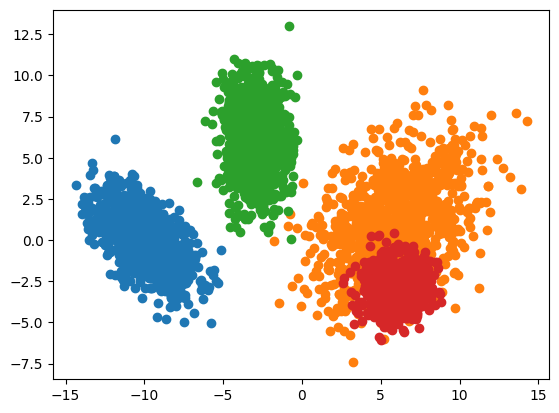

In [24]:
main()